Question 1 

(417, 632, 3)


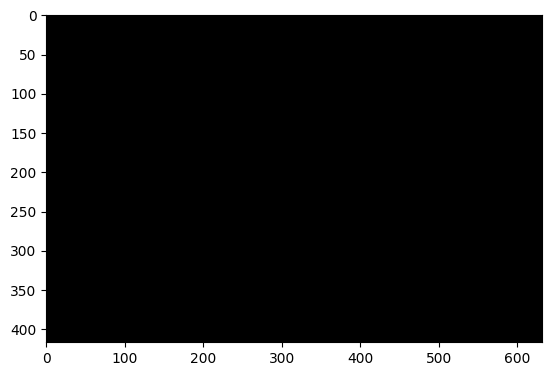

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the input image
input_image = cv2.imread('C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q1\ground truth\\lava21.jpg')

# Convert the input image to the HSV color space
hsv_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2HSV)

# Define the lower and upper HSV range for lava color (you may need to adjust these values)
lower_range = np.array([0, 125, 125])
upper_range = np.array([255, 255, 255])

# Create a mask to segment the lava based on color
color_mask = cv2.inRange(hsv_image, lower_range, upper_range)

# Convert the input image to grayscale for easier processing
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment lava region
ret, thresholded_image = cv2.threshold(gray_image, 70, 105, cv2.THRESH_BINARY)

# Perform morphological operations to remove noise and fill gaps
kernel = np.ones((5, 5), np.uint8)
morphed_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

# Combine the color-based mask and the morphology-based mask
final_mask = cv2.bitwise_and(color_mask, morphed_image)

# Find contours in the final mask
contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask image with white as the detected lava region
lava_result = np.zeros_like(input_image)
for contour in contours:
    if cv2.contourArea(contour) > 500:  # Adjust the area threshold as needed
        cv2.drawContours(lava_result, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
print(lava_result.shape)
# Plot the resulting mask image
final_inage = cv2.cvtColor(lava_result, cv2.COLOR_BGR2RGB)
plt.imshow(lava_result)



In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the input image
input_image = cv2.imread('/content/lava21.jpg')

# Convert the input image to the HSV color space
hsv_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2HSV)

# Define the lower and upper HSV range for lava color (adjust these values)
lower_range = np.array([0, 125, 125])
upper_range = np.array([20, 255, 255])

# Create a mask to segment the lava based on color
color_mask = cv2.inRange(hsv_image, lower_range, upper_range)

# Convert the input image to grayscale and apply adaptive thresholding
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
adaptive_threshold = cv2.adaptiveThreshold(
    blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Perform morphological operations to remove noise and fill gaps
kernel = np.ones((5, 5), np.uint8)
morphed_image = cv2.morphologyEx(adaptive_threshold, cv2.MORPH_CLOSE, kernel)

# Combine the color-based mask and the morphology-based mask
final_mask = cv2.bitwise_and(color_mask, morphed_image)

# Find contours in the final mask
contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask image with white as the detected lava region
lava_result = np.zeros_like(input_image)
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 1000 and cv2.arcLength(contour, True) > 100:  # Adjust thresholds as needed
        cv2.drawContours(lava_result, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)

# Plot the resulting mask image
plt.imshow(cv2.cvtColor(lava_result, cv2.COLOR_BGR2RGB))
plt.title("Lava Mask")
plt.axis('off')
plt.show()

QUESTION 3      

16 213


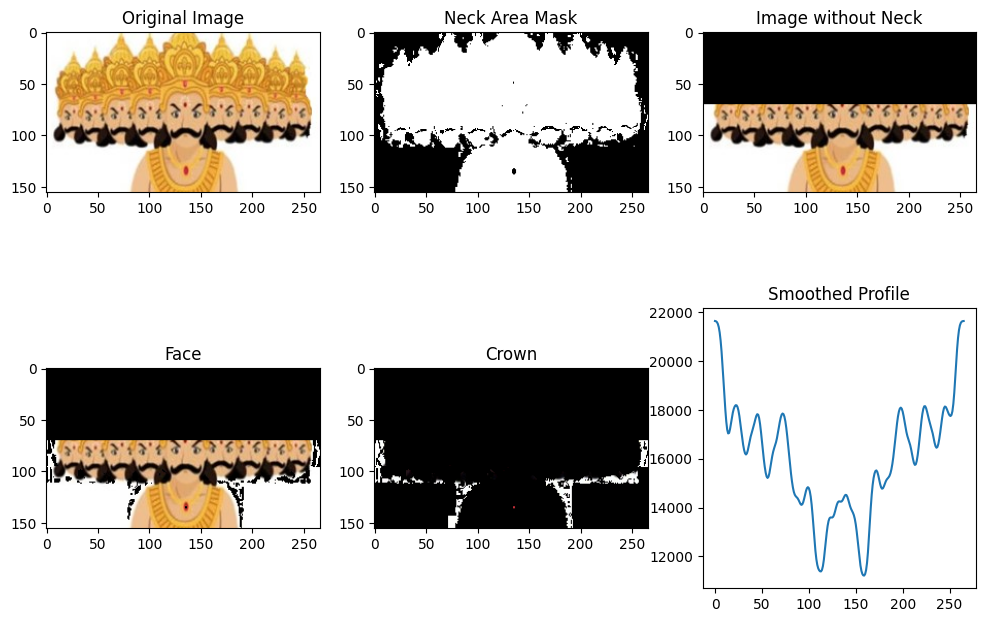

Classification: real


In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Step 1: Read and Preprocess the Image
image_path = 'C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2\\Assignment-2\\Q3\\test\\r6.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
hue_base, saturation, value = cv2.split(image_hsv)

# Step 2: Define Ravan Skin and Necklace Color Ranges
median_hue = np.median(hue_base)
skin_lower = int(max(0, median_hue - 20))
skin_upper = int(min(180, median_hue + 20))
necklace_lower = int(max(0, median_hue - 10))
necklace_upper = int(min(180, median_hue + 10))

# Step 3: Find Neck Position and Separate Neck Area
neck_mask = cv2.inRange(hue_base, necklace_lower, necklace_upper)
mean_position = int(np.mean(np.where(neck_mask == 255)[0]))
image_no_neck = image_rgb.copy()
image_no_neck[:mean_position, :, :] = 0

# Step 4: Separate Face and Crown
face_mask = cv2.inRange(hue_base, skin_lower, skin_upper)
image_face = cv2.bitwise_and(image_no_neck, image_no_neck, mask=face_mask)
crown_mask = cv2.inRange(hue_base, necklace_upper, 180)
image_crown = cv2.bitwise_and(image_no_neck, image_no_neck, mask=crown_mask)

# Step 5: Smoothing and Gaussian Filtering
image_gray = cv2.cvtColor(image_no_neck, cv2.COLOR_RGB2GRAY)
profile = np.sum(image_gray, axis=0)
smoothed_profile = cv2.GaussianBlur(profile.astype(np.float32), (15, 15), 0)

# Step 6: Counting Number of Heads using Watershed Algorithm (example, not accurate)
_, markers = cv2.connectedComponents(np.uint8(crown_mask))
num_heads_left = np.sum(markers == 1)
num_heads_right = np.sum(markers == 2)
print(num_heads_left,num_heads_right)
# Step 7: Output Classification
if num_heads_left + num_heads_right > 1:
    classification = "real"
else:
    classification = "fake"

# Step 8: Plots
plt.figure(figsize=(12, 8))

plt.subplot(231), plt.imshow(image_rgb), plt.title('Original Image')
plt.subplot(232), plt.imshow(neck_mask, cmap='gray'), plt.title('Neck Area Mask')
plt.subplot(233), plt.imshow(image_no_neck), plt.title('Image without Neck')
plt.subplot(234), plt.imshow(image_face), plt.title('Face')
plt.subplot(235), plt.imshow(image_crown), plt.title('Crown')
plt.subplot(236), plt.plot(smoothed_profile), plt.title('Smoothed Profile')

plt.show()

# Display classification result
print(f"Classification: {classification}")


Nithin Answer           



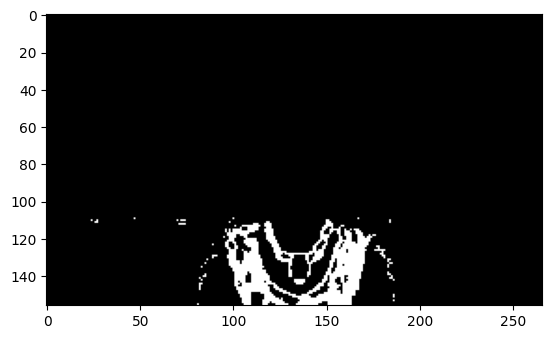

109.0 135.22188815393866
real


In [19]:

path ='C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2\\Assignment-2\\Q3\\test\\r6.jpg'
input_img = cv2.imread(path)
input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(input_img, cv2.COLOR_RGB2HSV)
hue_base = hsv_image[:, :, 0]
saturation = hsv_image[:, :, 1]
value = hsv_image[:, :, 2]

if np.median(hue_base) < 13:
    ravan_skin = [6.25, 12.5]
else:
    ravan_skin = [13, 16.5]

if np.median(hue_base) < 13:
    ravan_necklace = [21, 24]
else:
    ravan_necklace = [17.5, 19]

final_img = np.where((hue_base >= ravan_necklace[0]) & (hue_base <= ravan_necklace[1]), 255, 0)
xb, yb = np.where((input_img[:, :, 0] == 0) & (input_img[:, :, 1] == 0) & (input_img[:, :, 2] == 0))
x_neck = np.mean(xb)
final_img[0:int(x_neck), :] = 0
plt.imshow(final_img, cmap='gray')
plt.show()
x,y=np.where(final_img==255)
y_centre= np.mean(y)
print(x_neck,y_centre)

final_img = np.where((hue_base >= ravan_skin[0]) & (hue_base <= ravan_skin[1]), 255, 0)
final_img[int(x_neck):, :] = 0
hue_up = hue_base[0:int(x_neck), :]
x_c, y_c = np.where((hue_up >= ravan_necklace[0]) & (hue_up <= ravan_necklace[1]))

x_c = np.percentile(x_c, 80)
final_img[0:int(x_c), :] = 0

mean_1d = np.mean(final_img, axis=0)
sigma = 1.75
gaussian = np.exp(-(np.linspace(-6, 6, 60) ** 2) / (sigma * input_img.shape[1] / 430) ** 2 / 2)
gaussian = gaussian / sigma
mean_1d = np.convolve(mean_1d, gaussian, mode='same')

heads_left = 0
heads_right = 0
for i in range(1, int(y_centre)):
    if mean_1d[i] < mean_1d[i - 1] and mean_1d[i] < mean_1d[i + 1]:
        heads_left += 1
for i in range(int(y_centre), len(mean_1d) - 1):
    if mean_1d[i] < mean_1d[i - 1] and mean_1d[i] < mean_1d[i + 1]:
        heads_right += 1

if heads_left == 4 and heads_right == 5:
    print('fake')
else:
    print('real')


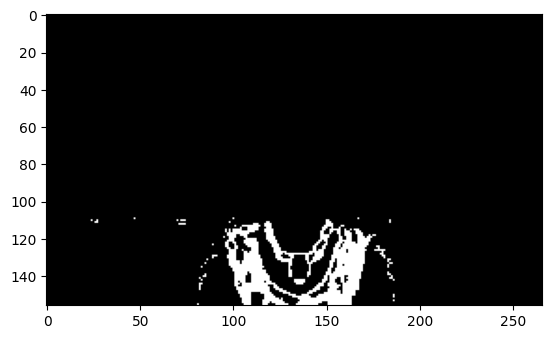

109.0 135.22188815393866
4 4
Fake


In [24]:
path ='C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2\\Assignment-2\\Q3\\test\\r6.jpg'
# Read the image and convert it to RGB format
i_img = cv2.imread(path)
i_img = cv2.cvtColor(i_img, cv2.COLOR_BGR2RGB)

# Convert the RGB image to HSV color space
hsv_image = cv2.cvtColor(i_img, cv2.COLOR_RGB2HSV)
hue_base = hsv_image[:, :, 0]

# Define thresholds for detecting Ravan's skin and necklace color
ravan_skin_threshold = [6.25, 12.5] if np.median(hue_base) < 13 else [13, 16.5]
ravan_necklace_threshold = [21, 24] if np.median(hue_base) < 13 else [17.5, 19]

# Create a mask for the necklace region based on the hue values
mask_img = np.where((hue_base >= ravan_necklace_threshold[0]) & (hue_base <= ravan_necklace_threshold[1]), 255, 0)

# Exclude black pixels from the mask based on the original image
xb, yb = np.where(np.all(i_img == [0, 0, 0], axis=-1))
x_coord_neck = np.mean(xb)
mask_img[0:int(x_coord_neck), :] = 0

# Display the necklace mask
plt.imshow(mask_img, cmap='gray')
plt.show()

# Find the coordinates of the white pixels in the mask
x, y = np.where(mask_img == 255)
y_centre = np.mean(y)
print(x_coord_neck, y_centre)

# Create a mask for Ravan's skin based on the defined thresholds
mask_img = np.where((hue_base >= ravan_skin_threshold[0]) & (hue_base <= ravan_skin_threshold[1]), 255, 0)
mask_img[int(x_coord_neck):, :] = 0

# Extract the hue values from the top region of the image
hue_top = hue_base[0:int(x_coord_neck), :]
x_c, y_c = np.where((hue_top >= ravan_necklace_threshold[0]) & (hue_top <= ravan_necklace_threshold[1]))

# Set a threshold for the top region of the necklace mask
x_c = np.percentile(x_c, 80)
mask_img[0:int(x_c), :] = 0

# Apply a Gaussian filter to the mean of the mask to identify heads
sigma = 1.75
gaussian = np.exp(-(np.linspace(-6, 6, 60) ** 2) / (sigma * i_img.shape[1] / 430) ** 2 / 2)
gaussian = gaussian / sigma
mean_face_mask = np.convolve(np.mean(mask_img, axis=0), gaussian, mode='same')

# Count the number of heads on the left and right sides of the image
heads_left = sum(mean_face_mask[i] < mean_face_mask[i - 1] and mean_face_mask[i] < mean_face_mask[i + 1] for i in range(1, int(y_centre)))
heads_right = sum(mean_face_mask[i] < mean_face_mask[i - 1] and mean_face_mask[i] < mean_face_mask[i + 1] for i in range(int(y_centre), len(mean_face_mask) - 1))

print(heads_left, heads_right)
if heads_left == 4 and heads_right == 5:
    print('Real')
else:
    print('Fake')


In [5]:
import cv2
import numpy as np

# Step 1: File Path and Image Loading
image_path =  'C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2\\Assignment-2\\Q3\\test\\r1.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 2: Colorspace Conversion
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
hue_base, saturation, value = cv2.split(image_hsv)

# Step 3: Determination of Ranges for Skin and Necklace Colors
median_hue = np.median(hue_base)
hue_range_skin = (int(median_hue - 10), int(median_hue + 10))
hue_range_necklace = (int(median_hue - 20), int(median_hue + 20))

# Step 4: Binary Mask for Necklace
mask_necklace = cv2.inRange(hue_base, hue_range_necklace[0], hue_range_necklace[1])

# Assuming background is at the bottom, remove pixels in the bottom part
height, width = mask_necklace.shape
mask_necklace[height//2:, :] = 0

# Display the resulting binary mask for the necklace
cv2.imshow('Necklace Mask', mask_necklace)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Calculate mean y-coordinate of pixels in the mask
y_centre_necklace = np.mean(np.nonzero(mask_necklace)[0])

# Step 5: Binary Mask for Skin
mask_skin = cv2.inRange(hue_base, hue_range_skin[0], hue_range_skin[1])

# Assuming the region above the necklace is skin, remove pixels in the upper part
mask_skin[:int(y_centre_necklace), :] = 0

# Display the resulting binary mask for the skin
# cv2.imshow('Skin Mask', mask_skin)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Step 6: Smoothing and Analysis of Horizontal Profile
kernel = np.ones((1, 50), np.uint8)
smoothed_mask_necklace = cv2.morphologyEx(mask_necklace, cv2.MORPH_CLOSE, kernel)
smoothed_profile = np.mean(smoothed_mask_necklace, axis=0)

# Step 7: Counting Heads on the Left and Right
left_minima = len(np.where(np.diff(smoothed_profile[:width//2]) > 0)[0])
right_minima = len(np.where(np.diff(smoothed_profile[width//2:]) > 0)[0])

# Step 8: Decision on Real or Fake Object
expected_left_minima = 4  # Set your expected value based on your data
expected_right_minima = 5 # Set your expected value based on your data
print(left_minima,right_minima)

if left_minima == expected_left_minima and right_minima == expected_right_minima:
    print('Real')
else:
    print('Fake')


0 0
Fake


In [6]:
import cv2
import numpy as np
from scipy.ndimage import label, find_objects, gaussian_filter1d

# Step 1: File Path and Image Loading
file_path = 'C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2\\Assignment-2\\Q3\\test\\r1.jpg'
image = cv2.imread(file_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 2: Colorspace Conversion
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
hue_base, saturation, value = cv2.split(image_hsv)

# Step 3: Determination of Ranges for Skin and Necklace Colors

median_hue = np.median(hue_base)

ravan_skin = [6.25, 12.5] if median_hue < 13 else [13, 16.5]
ravan_necklace = [21, 24] if median_hue < 13 else [17.5, 19]

# Step 4: Binary Mask for Necklace
necklace_mask = cv2.inRange(image_hsv, *ravan_necklace)
bottom_mask = np.zeros_like(necklace_mask)
bottom_mask[image_rgb.shape[0]//2:, :] = 255
final_necklace_mask = cv2.bitwise_and(necklace_mask, bottom_mask)
y_coords = np.mean(np.where(final_necklace_mask > 0)[0])
print("Mean Y-coordinate of Necklace Mask:", y_coords)

# Step 5: Binary Mask for Skin
skin_mask = cv2.inRange(image_hsv, *ravan_skin)
upper_mask = np.zeros_like(skin_mask)
upper_mask[:image_rgb.shape[0]//2, :] = 255
final_skin_mask = cv2.bitwise_and(skin_mask, upper_mask)

# Step 6: Smoothing and Analysis of Horizontal Profile
horizontal_profile = np.mean(final_skin_mask, axis=1)
smoothed_profile = gaussian_filter1d(horizontal_profile, sigma=5)

# Step 7: Counting Heads on the Left and Right by Watershed Algorithm
threshold = 10
local_minima = np.where(np.r_[True, smoothed_profile[1:] < smoothed_profile[:-1]] & np.r_[smoothed_profile[:-1] < smoothed_profile[1:], True] & (smoothed_profile < threshold))[0]
left_minima = np.sum(local_minima < y_coords)
right_minima = np.sum(local_minima > y_coords)

# Step 8: Decision on Real or Fake Object
expected_left_minima = 4  # Update with the expected values
expected_right_minima = 5  # Update with the expected values
print(left_minima,right_minima)
if left_minima == expected_left_minima and right_minima == expected_right_minima:
    print("Fake")
else:
    print("Real")

# Displaying the results
cv2.imshow("Necklace Mask", final_necklace_mask)
cv2.imshow("Skin Mask", final_skin_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


11.0
Mean Y-coordinate of Necklace Mask: 128.36078538314698
1 0
Real


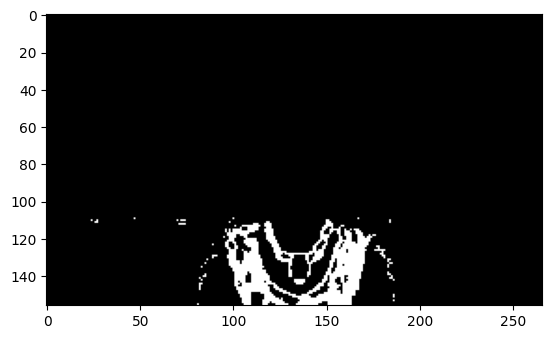

109.0 135.22188815393866
4 4
Fake


In [22]:
.
import matplotlib.pyplot as plt

path = 'C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2\\Assignment-2\\Q3\\test\\r6.jpg'
input_img = cv2.imread(path)
input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(input_img, cv2.COLOR_RGB2HSV)
hue_base = hsv_image[:, :, 0]

ravan_skin_threshold = [6.25, 12.5] if np.median(hue_base) < 13 else [13, 16.5]
ravan_necklace_threshold = [21, 24] if np.median(hue_base) < 13 else [17.5, 19]

final_img = np.where((hue_base >= ravan_necklace_threshold[0]) & (hue_base <= ravan_necklace_threshold[1]), 255, 0)

xb, yb = np.where(np.all(input_img == [0, 0, 0], axis=-1))
x_neck = np.mean(xb)
final_img[0:int(x_neck), :] = 0

plt.imshow(final_img, cmap='gray')
plt.show()

x, y = np.where(final_img == 255)
y_centre = np.mean(y)
print(x_neck, y_centre)

final_img = np.where((hue_base >= ravan_skin_threshold[0]) & (hue_base <= ravan_skin_threshold[1]), 255, 0)
final_img[int(x_neck):, :] = 0

hue_up = hue_base[0:int(x_neck), :]
x_c, y_c = np.where((hue_up >= ravan_necklace_threshold[0]) & (hue_up <= ravan_necklace_threshold[1]))

x_c = np.percentile(x_c, 80)
final_img[0:int(x_c), :] = 0

sigma = 1.75
gaussian = np.exp(-(np.linspace(-6, 6, 60) ** 2) / (sigma * input_img.shape[1] / 430) ** 2 / 2)
gaussian = gaussian / sigma
mean_1d = np.convolve(np.mean(final_img, axis=0), gaussian, mode='same')

heads_left = sum(mean_1d[i] < mean_1d[i - 1] and mean_1d[i] < mean_1d[i + 1] for i in range(1, int(y_centre)))
heads_right = sum(mean_1d[i] < mean_1d[i - 1] and mean_1d[i] < mean_1d[i + 1] for i in range(int(y_centre), len(mean_1d) - 1))

print(heads_left,heads_right)
if heads_left == 4 and heads_right == 5:
    print('Real')
else:
    print('Fake')


Correct one so far 

In [42]:
import cv2
import numpy as np
from scipy.ndimage import convolve1d
audio_path = 'C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q3\\test\\r13.jpg'
# Read the image file and convert it to RGB format
i_img = cv2.imread(audio_path)
i_img = cv2.cvtColor(i_img, cv2.COLOR_BGR2RGB)

# Convert the RGB to HSV color space
hsv_image = cv2.cvtColor(i_img, cv2.COLOR_RGB2HSV)
hue_base = hsv_image[:, :, 0]

# Define a  thresholds for detecting Ravan's skin and necklace color this was done manually..
ravan_skin_threshold = [6.25, 12.5] if np.median(hue_base) < 13 else [13, 16.5]
ravan_necklace_threshold = [21, 24] if np.median(hue_base) < 13 else [17.5, 19]

# Now we create  a mask for the necklace region based on the hue values we got 
mask_img = np.where((hue_base >= ravan_necklace_threshold[0]) & (hue_base <= ravan_necklace_threshold[1]), 255, 0)

# Excluding the black pixels from the mask based on the original image
xb, yb = np.where(np.all(i_img == [0, 0, 0], axis=-1))
x_coord_neck = np.mean(xb)
mask_img[0:int(x_coord_neck), :] = 0

# Display the necklace mask
# plt.imshow(mask_img, cmap='gray')
# plt.show()

# Finding the coordinates of the white pixels in the mask
x, y = np.where(mask_img == 255)
y_centre = np.mean(y)
#print(x_coord_neck, y_centre)

# Create a mask for Ravan's skin based on the defined thresholds
mask_img = np.where((hue_base >= ravan_skin_threshold[0]) & (hue_base <= ravan_skin_threshold[1]), 255, 0)
mask_img[int(x_coord_neck):, :] = 0

# Extracting the hue values from the top region of the image
hue_top = hue_base[0:int(x_coord_neck), :]
x_c, y_c = np.where((hue_top >= ravan_necklace_threshold[0]) & (hue_top <= ravan_necklace_threshold[1]))

# Now Set a threshold for the top region of the necklace mask
x_c = np.percentile(x_c, 80)
mask_img[0:int(x_c), :] = 0
# Applying  a Gaussian filter to the mean of the mask to identify heads
sigma = 8.4
gaussian = np.exp(-(np.linspace(-6, 6, 60) ** 2) / (sigma * i_img.shape[1] / 430) ** 2 / 2)
gaussian = gaussian / sigma
mean_face_mask = cv2.GaussianBlur(np.mean(mask_img, axis=0), (0, 0), sigma)
# print(mean_face_mask)
# Count the number of heads on the left and right sides of the image
heads_left = sum(mean_face_mask[i] < mean_face_mask[i - 1] and mean_face_mask[i] < mean_face_mask[i + 1] for i in range(1, int(y_centre)))
heads_right = sum(mean_face_mask[i] < mean_face_mask[i - 1] and mean_face_mask[i] < mean_face_mask[i + 1] for i in range(int(y_centre), len(mean_face_mask) - 1))

print(heads_left, heads_right)
if heads_left == 4 and heads_right == 5:
    class_name = 'real'
else:
    class_name = 'fake'

print(class_name)

[3] [5]
fake


In [ ]:

from scipy.ndimage import convolve1d
audio_path = 'C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2\\Assignment-2\\Q3\\test\\r1.jpg'
# Read the image file and convert it to RGB format
i_img = cv2.imread(audio_path)
i_img = cv2.cvtColor(i_img, cv2.COLOR_BGR2RGB)

# Convert the RGB to HSV color space
hsv_image = cv2.cvtColor(i_img, cv2.COLOR_RGB2HSV)
hue_base = hsv_image[:, :, 0]

# Define a  thresholds for detecting Ravan's skin and necklace color this was done manually..
ravan_skin_threshold = [6.25, 12.5] if np.median(hue_base) < 13 else [13, 16.5]
ravan_necklace_threshold = [21, 24] if np.median(hue_base) < 13 else [17.5, 19]

# Now we create  a mask for the necklace region based on the hue values we got 
mask_img = np.where((hue_base >= ravan_necklace_threshold[0]) & (hue_base <= ravan_necklace_threshold[1]), 255, 0)

# Excluding the black pixels from the mask based on the original image
xb, yb = np.where(np.all(i_img == [0, 0, 0], axis=-1))
x_coord_neck = np.mean(xb)
mask_img[0:int(x_coord_neck), :] = 0

# Display the necklace mask
# plt.imshow(mask_img, cmap='gray')
# plt.show()

# Finding the coordinates of the white pixels in the mask
x, y = np.where(mask_img == 255)
y_centre = np.mean(y)
#print(x_coord_neck, y_centre)

# Create a mask for Ravan's skin based on the defined thresholds
mask_img = np.where((hue_base >= ravan_skin_threshold[0]) & (hue_base <= ravan_skin_threshold[1]), 255, 0)
mask_img[int(x_coord_neck):, :] = 0

# Extracting the hue values from the top region of the image
hue_top = hue_base[0:int(x_coord_neck), :]
x_c, y_c = np.where((hue_top >= ravan_necklace_threshold[0]) & (hue_top <= ravan_necklace_threshold[1]))

# Now Set a threshold for the top region of the necklace mask
x_c = np.percentile(x_c, 80)
mask_img[0:int(x_c), :] = 0
# Applying  a Gaussian filter to the mean of the mask to identify heads
sigma = 6.7
gaussian = np.exp(-(np.linspace(-6, 6, 60) ** 2) / (sigma * i_img.shape[1] / 430) ** 2 / 2)
gaussian = gaussian / sigma
mean_face_mask = cv2.GaussianBlur(np.mean(mask_img, axis=0), (0, 0), sigma)
# print(mean_face_mask)
# Count the number of heads on the left and right sides of the image
heads_left = sum(mean_face_mask[i] < mean_face_mask[i - 1] and mean_face_mask[i] < mean_face_mask[i + 1] for i in range(1, int(y_centre)))
heads_right = sum(mean_face_mask[i] < mean_face_mask[i - 1] and mean_face_mask[i] < mean_face_mask[i + 1] for i in range(int(y_centre), len(mean_face_mask) - 1))

print(heads_left, heads_right)
if heads_left == 4 and heads_right == 5:
    class_name = 'real'
else:
    class_name = 'fake'

print(class_name)

Question 2  

In [14]:
import cv2
import numpy as np

spatial_sigma =75   
color_sigma = 75

flash_image = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\1_b.jpg")
no_flash_image = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\1_a.jpg")

# Convert images to LAB color space
flash_lab = cv2.cvtColor(flash_image, cv2.COLOR_BGR2LAB)
noflash_image = cv2.cvtColor(no_flash_image, cv2.COLOR_BGR2LAB)
# Convert images to grayscale
flash_image_gray = cv2.cvtColor(flash_image, cv2.COLOR_BGR2GRAY)
noflash_image_gray = cv2.cvtColor(noflash_image, cv2.COLOR_BGR2GRAY)

# Calculate the difference between the flash and no-flash images
difference_image = np.abs(flash_image_gray - noflash_image_gray)

# Apply a bilateral filter to the difference image to preserve edges
filtered_difference_image = cv2.bilateralFilter(difference_image, 9, 75, 75)

# Create a mask based on the filtered difference image
mask = filtered_difference_image > 20

# Fuse the flash and no-flash images using the mask
prolight_image = np.where(mask, flash_image, noflash_image)

# Convert the prolight image back to color
prolight_image = cv2.cvtColor(prolight_image, cv2.COLOR_BGR2RGB)


# Display the results
cv2.imshow("Flash Image", flash_image)
cv2.imshow("No Flash Image", no_flash_lab)
cv2.imshow("Prolight Image", prolight_image    )
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: operands could not be broadcast together with shapes (636,780) (636,780,3) (636,780,3) 

In [21]:
import numpy as np
import cv2

class Joint_bilateral_filter(object):
    def __init__(self, sigma_s, sigma_r):
        self.sigma_r = sigma_r
        self.sigma_s = sigma_s
        self.wndw_size = 6 * sigma_s + 1
        self.pad_w = 3 * sigma_s

    def joint_bilateral_filter(self, img, guidance):
        BORDER_TYPE = cv2.BORDER_REFLECT
        padded_img = cv2.copyMakeBorder(img, self.pad_w, self.pad_w, self.pad_w,
                                        self.pad_w, BORDER_TYPE).astype(np.int32)
        padded_guidance = cv2.copyMakeBorder(guidance, self.pad_w, self.pad_w,
                                             self.pad_w, self.pad_w, BORDER_TYPE).astype(np.int32)

        LUT_s = np.exp(-0.5 * (np.arange(self.pad_w + 1) ** 2) / self.sigma_s ** 2)
        LUT_r = np.exp(-0.5 * (np.arange(256) / 255) ** 2 / self.sigma_r ** 2)

        wgt_sum, result = np.zeros(padded_img.shape), np.zeros(padded_img.shape)
        for x in range(-self.pad_w, self.pad_w + 1):
            for y in range(-self.pad_w, self.pad_w + 1):
                dT = LUT_r[np.abs(np.roll(padded_guidance, [y, x], axis=[0, 1]) - padded_guidance)]
                r_w = dT if dT.ndim == 2 else np.prod(dT, axis=2)
                s_w = LUT_s[np.abs(x)] * LUT_s[np.abs(y)]
                t_w = s_w * r_w
                padded_img_roll = np.roll(padded_img, [y, x], axis=[0, 1])
                for channel in range(padded_img.ndim):
                    result[:, :, channel] += padded_img_roll[:, :, channel] * t_w
                    wgt_sum[:, :, channel] += t_w
        output = (result / wgt_sum)[self.pad_w:-self.pad_w, self.pad_w:-self.pad_w, :]

        return np.clip(output, 0, 255).astype(np.uint8)

def cross_bilateral_filter_twice(image_flash, image_no_flash, sigma_s, sigma_r, alpha):
    joint_bilateral = Joint_bilateral_filter(sigma_s, sigma_r)
    
    result_pass1 = joint_bilateral.joint_bilateral_filter(image_flash, image_flash)
    
    gradient_flash = cv2.Laplacian(image_flash, cv2.CV_64F)
    result_pass1 = result_pass1 + alpha * gradient_flash
    
    result_pass2 = joint_bilateral.joint_bilateral_filter(result_pass1, image_no_flash)
    
    return result_pass2


image_flash = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\1_b.jpg")
image_no_flash = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\1_a.jpg")
sigma_s = 3
sigma_r = 0.1
alpha = 0.1

result_image = cross_bilateral_filter_twice(image_flash, image_no_flash, sigma_s, sigma_r, alpha)

# cv2.imshow('Original Flash Image', image_flash)
# cv2.imshow('Original No Flash Image', image_no_flash)
# cv2_imshow(result_image)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [20]:
import numpy as np
import cv2

class JointBilateralFilter:
    def __init__(self, sigma_s, sigma_r):
        self.sigma_r = sigma_r
        self.sigma_s = sigma_s
        self.wndw_size = 6 * sigma_s + 1
        self.pad_w = 3 * sigma_s
        self.initialize_lookup_tables()

    def initialize_lookup_tables(self):
        self.LUT_s = np.exp(-0.5 * (np.arange(self.pad_w + 1) ** 2) / self.sigma_s ** 2)
        self.LUT_r = np.exp(-0.5 * (np.arange(256) / 255) ** 2 / self.sigma_r ** 2)

    def joint_bilateral_filter(self, img, guidance):
        BORDER_TYPE = cv2.BORDER_REFLECT
        padded_img = cv2.copyMakeBorder(img, self.pad_w, self.pad_w, self.pad_w,
                                        self.pad_w, BORDER_TYPE).astype(np.int32)
        padded_guidance = cv2.copyMakeBorder(guidance, self.pad_w, self.pad_w,
                                             self.pad_w, self.pad_w, BORDER_TYPE).astype(np.int32)

        wgt_sum, result = np.zeros_like(padded_img), np.zeros_like(padded_img)

        for x in range(-self.pad_w, self.pad_w + 1):
            for y in range(-self.pad_w, self.pad_w + 1):
                dT = self.LUT_r[np.abs(np.roll(padded_guidance, [y, x], axis=[0, 1]) - padded_guidance)]
                r_w = np.prod(dT, axis=2) if dT.ndim == 3 else dT
                s_w = self.LUT_s[np.abs(x)] * self.LUT_s[np.abs(y)]
                t_w = s_w * r_w

                padded_img_roll = np.roll(padded_img, [y, x], axis=[0, 1])
                for channel in range(padded_img.ndim):
                    result[:, :, channel] += padded_img_roll[:, :, channel] * t_w[:, :, None]
                    wgt_sum[:, :, channel] += t_w
               

        output = (result / wgt_sum)[self.pad_w:-self.pad_w, self.pad_w:-self.pad_w, :]
        return np.clip(output, 0, 255).astype(np.uint8)

def cross_bilateral_filter_twice(image_flash, image_no_flash, sigma_s, sigma_r, alpha):
    joint_bilateral = JointBilateralFilter(sigma_s, sigma_r)
    
    result_pass1 = joint_bilateral.joint_bilateral_filter(image_flash, image_flash)
    
    gradient_flash = cv2.Laplacian(image_flash, cv2.CV_64F)
    result_pass1 = result_pass1 + alpha * gradient_flash
    
    result_pass2 = joint_bilateral.joint_bilateral_filter(result_pass1, image_no_flash)
    
    return result_pass2

# Rest of the code remains unchanged...
image_flash = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\1_b.jpg")
image_no_flash = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\1_a.jpg")
sigma_s = 3
sigma_r = 0.1
alpha = 0.1

result_image = cross_bilateral_filter_twice(image_flash, image_no_flash, sigma_s, sigma_r, alpha)

ValueError: operands could not be broadcast together with shapes (654,798) (654,798,1) 

Fail 1

In [25]:
import cv2
import numpy as np

def cross_bilateral_filter(flash_image, no_flash_image, spatial_sigma, color_sigma):
    # Convert the images to float32 for calculations
    flash_image = flash_image.astype(np.float32)
    no_flash_image = no_flash_image.astype(np.float32)
    
    # Calculate the spatial and color weight matrices
    spatial_weight = np.exp(-((flash_image - no_flash_image) ** 2) / (2 * spatial_sigma ** 2))
    color_weight = np.exp(-((flash_image - no_flash_image) ** 2) / (2 * color_sigma ** 2))
    
    # Normalize the weight matrices
    spatial_weight /= np.sum(spatial_weight, axis=2, keepdims=True)
    color_weight /= np.sum(color_weight, axis=2, keepdims=True)
    
    # Apply the filter
    filtered_image = np.sum(spatial_weight * color_weight * no_flash_image, axis=2)
    
    # Convert the filtered image back to uint8
    filtered_image = filtered_image.astype(np.uint8)
    
    return filtered_image

# Load the flash and no-flash images
flash_image = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\2_b.jpg")  # Replace 'flash_image.jpg' with the actual file name of the flash image
no_flash_image = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\2_a.jpg")  # Replace 'no_flash_image.jpg' with the actual file name of the no-flash image

# Preprocess the images if necessary (e.g., resizing, adjusting color channels, etc.)

# Apply the cross bilateral filter with desired spatial_sigma and color_sigma values
spatial_sigma = 10.0
color_sigma = 200.0
prolight_image = cross_bilateral_filter(flash_image, no_flash_image, spatial_sigma, color_sigma)

# Save and display the final prolight image
cv2.imwrite('prolight_image.jpg', prolight_image)  # Replace 'prolight_image.jpg' with the desired output file name
cv2.imshow('Prolight Image', prolight_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


C:\Users\DELL\AppData\Local\Temp\ipykernel_8664\2917790305.py:14: RuntimeWarning: invalid value encountered in divide
  spatial_weight /= np.sum(spatial_weight, axis=2, keepdims=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8664\2917790305.py:21: RuntimeWarning: invalid value encountered in cast
  filtered_image = filtered_image.astype(np.uint8)


test 2 

In [26]:
import cv2
import numpy as np

def joint_bilateral_filter(img, guidance, sigma_s, sigma_r):
    BORDER_TYPE = cv2.BORDER_REFLECT
    pad_width = int(3 * sigma_s)

    padded_img = cv2.copyMakeBorder(img, pad_width, pad_width, pad_width, pad_width, BORDER_TYPE).astype(np.int32)
    padded_guidance = cv2.copyMakeBorder(guidance, pad_width, pad_width, pad_width, pad_width, BORDER_TYPE).astype(np.int32)

    LUT_s = np.exp(-0.5 * (np.arange(pad_width + 1) ** 2) / sigma_s ** 2)
    LUT_r = np.exp(-0.5 * (np.arange(256) / 255) ** 2 / sigma_r ** 2)

    wgt_sum, result = np.zeros(padded_img.shape), np.zeros(padded_img.shape)

    for x in range(-pad_width, pad_width + 1):
        for y in range(-pad_width, pad_width + 1):
            dT = LUT_r[np.abs(np.roll(padded_guidance, [y, x], axis=[0, 1]) - padded_guidance)]
            r_w = dT if dT.ndim == 2 else np.prod(dT, axis=2)
            s_w = LUT_s[np.abs(x)] * LUT_s[np.abs(y)]
            t_w = s_w * r_w
            padded_img_roll = np.roll(padded_img, [y, x], axis=[0, 1])

            for channel in range(padded_img.ndim):
                result[:, :, channel] += padded_img_roll[:, :, channel] * t_w
                wgt_sum[:, :, channel] += t_w

    output = (result / wgt_sum)[pad_width:-pad_width, pad_width:-pad_width, :]

    return np.clip(output, 0, 255).astype(np.uint8)

def cross_bilateral_filter_twice(image_flash, image_no_flash, sigma_s, sigma_r, alpha):
    BORDER_TYPE = cv2.BORDER_REFLECT
    pad_width = int(3 * sigma_s)

    padded_image_flash = cv2.copyMakeBorder(image_flash, pad_width, pad_width, pad_width, pad_width, BORDER_TYPE).astype(np.int32)

    result_pass1 = joint_bilateral_filter(padded_image_flash, padded_image_flash, sigma_s, sigma_r)

    gradient_flash = cv2.Laplacian(image_flash, cv2.CV_64F)
    result_pass1 = result_pass1 + alpha * gradient_flash

    padded_result_pass1 = cv2.copyMakeBorder(result_pass1, pad_width, pad_width, pad_width, pad_width, BORDER_TYPE).astype(np.int32)

    result_pass2 = joint_bilateral_filter(padded_result_pass1, image_no_flash, sigma_s, sigma_r)

    return result_pass2

# Example usage
image_flash = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\1_b.jpg")
image_no_flash = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\1_a.jpg")
sigma_s = 3
sigma_r = 0.1
alpha = 0.1

result_image = cross_bilateral_filter_twice(image_flash, image_no_flash, sigma_s, sigma_r, alpha)

# Display or save the result_image as needed
cv2.imshow("Result Image", result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\bilateral_filter.dispatch.cpp:426: error: (-210:Unsupported format or combination of formats) Bilateral filtering is only implemented for 8u and 32f images in function 'cv::bilateralFilter'


In [27]:

import numpy as np
import cv2


def joint_bilateral_filter(img, guidance):

    # wndw_size = 6 * sigma_s + 1
    pad_w = 3 * sigma_s
    BORDER_TYPE = cv2.BORDER_REFLECT
    padded_img = cv2.copyMakeBorder(img, pad_w, pad_w, pad_w,
                                    pad_w, BORDER_TYPE).astype(np.int32)
    padded_guidance = cv2.copyMakeBorder(guidance, pad_w, pad_w,
                                            pad_w, pad_w, BORDER_TYPE).astype(np.int32)

    LUT_s = np.exp(-0.5 * (np.arange(pad_w + 1) ** 2) / sigma_s ** 2)
    LUT_r = np.exp(-0.5 * (np.arange(256) / 255) ** 2 / sigma_r ** 2)

    wgt_sum, result = np.zeros(padded_img.shape), np.zeros(padded_img.shape)
    for x in range(-pad_w, pad_w + 1):
        for y in range(-pad_w, pad_w + 1):
            dT = LUT_r[np.abs(np.roll(padded_guidance, [y, x], axis=[0, 1]) - padded_guidance)]
            r_w = dT if dT.ndim == 2 else np.prod(dT, axis=2)
            s_w = LUT_s[np.abs(x)] * LUT_s[np.abs(y)]
            t_w = s_w * r_w
            padded_img_roll = np.roll(padded_img, [y, x], axis=[0, 1])
            for channel in range(padded_img.ndim):
                result[:, :, channel] += padded_img_roll[:, :, channel] * t_w
                wgt_sum[:, :, channel] += t_w
    output = (result / wgt_sum)[pad_w:-pad_w, pad_w:-pad_w, :]

    return np.clip(output, 0, 255).astype(np.uint8)
    

def cross_bilateral_filter_twice(image_flash, image_no_flash, alpha):

    result_pass1 = joint_bilateral_filter(image_flash, image_flash)
    
    gradient_flash = cv2.Laplacian(image_flash, cv2.CV_64F)
    result_pass1 = result_pass1 + alpha * gradient_flash
    
    result_pass2 = joint_bilateral_filter(result_pass1, image_no_flash)
    
    return result_pass2

image_flash = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\1_b.jpg")
image_no_flash = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\1_a.jpg")
sigma_s = 3
sigma_r = 0.1
alpha = 0.1

result_image = cross_bilateral_filter_twice(image_flash, image_no_flash, alpha)


cv2.imshow('Original Flash Image', image_flash)
cv2.imshow('Original No Flash Image', image_no_flash)
# cv2_imshow(result_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:

import numpy as np
import cv2


def joint_bilateral_filter(img, guidance):

    # wndw_size = 6 * sigma_s + 1
    pad_w = 3 * sigma_s
    BORDER_TYPE = cv2.BORDER_REFLECT
    padded_img = cv2.copyMakeBorder(img, pad_w, pad_w, pad_w,
                                    pad_w, BORDER_TYPE).astype(np.int32)
    padded_guidance = cv2.copyMakeBorder(guidance, pad_w, pad_w,
                                            pad_w, pad_w, BORDER_TYPE).astype(np.int32)

    LUT_s = np.exp(-0.5 * (np.arange(pad_w + 1) ** 2) / sigma_s ** 2)
    LUT_r = np.exp(-0.5 * (np.arange(256) / 255) ** 2 / sigma_r ** 2)

    wgt_sum, result = np.zeros(padded_img.shape), np.zeros(padded_img.shape)
    for x in range(-pad_w, pad_w + 1):
        for y in range(-pad_w, pad_w + 1):
            dT = LUT_r[np.abs(np.roll(padded_guidance, [y, x], axis=[0, 1]) - padded_guidance)]
            r_w = dT if dT.ndim == 2 else np.prod(dT, axis=2)
            s_w = LUT_s[np.abs(x)] * LUT_s[np.abs(y)]
            t_w = s_w * r_w
            padded_img_roll = np.roll(padded_img, [y, x], axis=[0, 1])
            for channel in range(padded_img.ndim):
                result[:, :, channel] += padded_img_roll[:, :, channel] * t_w
                wgt_sum[:, :, channel] += t_w
    output = (result / wgt_sum)[pad_w:-pad_w, pad_w:-pad_w, :]

    return np.clip(output, 0, 255).astype(np.uint8)
    

def cross_bilateral_filter_twice(image_flash, image_no_flash, alpha):

    result_pass1 = joint_bilateral_filter(image_flash, image_flash)
    
    gradient_flash = cv2.Laplacian(image_flash, cv2.CV_64F)
    result_pass1 = result_pass1 + alpha * gradient_flash
    
    result_pass2 = joint_bilateral_filter(result_pass1, image_no_flash)
    
    return result_pass2

image_flash = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\2_b.jpg")
image_no_flash = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\2_a.jpg")
sigma_s = 3
sigma_r = 0.1
alpha = 0.1

result_image = cross_bilateral_filter_twice(image_flash, image_no_flash, alpha)


cv2.imshow('Original Flash Image', image_flash)
cv2.imshow('Original No Flash Image', image_no_flash)
cv2.imshow('Result Image', result_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
import numpy as np
import cv2

def joint_bilateral_filter(img, guidance, sigma_s, sigma_r):
    pad_w = int(3 * sigma_s)
    BORDER_TYPE = cv2.BORDER_REFLECT
    padded_img = cv2.copyMakeBorder(img, pad_w, pad_w, pad_w, pad_w, BORDER_TYPE).astype(np.float64)
    padded_guidance = cv2.copyMakeBorder(guidance, pad_w, pad_w, pad_w, pad_w, BORDER_TYPE).astype(np.float64)

    LUT_s = np.exp(-0.5 * (np.arange(pad_w + 1) ** 2) / sigma_s ** 2)
    LUT_r = np.exp(-0.5 * (np.arange(256) / 255) ** 2 / sigma_r ** 2)

    w, h, _ = padded_img.shape
    result = np.zeros_like(padded_img)
    wgt_sum = np.zeros((w, h, 1), dtype=np.float64)

    for x in range(-pad_w, pad_w + 1):
        for y in range(-pad_w, pad_w + 1):
            dT = LUT_r[np.abs(np.round(np.roll(padded_guidance, [y, x], axis=[0, 1])) - padded_guidance).astype(int)]
            r_w = dT if dT.ndim == 2 else np.prod(dT, axis=2)
            s_w = LUT_s[np.abs(x)] * LUT_s[np.abs(y)]
            t_w = s_w * r_w
            padded_img_roll = np.roll(padded_img, [y, x], axis=[0, 1])

            result += padded_img_roll * t_w[:, :, np.newaxis]
            wgt_sum += t_w[:, :, np.newaxis]

    output = (result / wgt_sum).astype(np.uint8)
    return np.clip(output, 0, 255)[pad_w:-pad_w, pad_w:-pad_w, :]

def cross_bilateral_filter_twice(image_flash, image_no_flash, alpha, sigma_s, sigma_r):
    result_pass1 = joint_bilateral_filter(image_flash, image_flash, sigma_s, sigma_r)
    
    gradient_flash = cv2.Laplacian(image_flash, cv2.CV_64F)
    result_pass1 = result_pass1 + alpha * gradient_flash
    
    result_pass2 = joint_bilateral_filter(result_pass1, image_no_flash, sigma_s, sigma_r)
    
    return result_pass2

# Your image paths
image_flash_path = "C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\1_b.jpg"
image_no_flash_path = "C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\1_a.jpg"

image_flash = cv2.imread(image_flash_path)
image_no_flash = cv2.imread(image_no_flash_path)

sigma_s = 3
sigma_r = 0.1
alpha = 0.1

result_image = cross_bilateral_filter_twice(image_flash, image_no_flash, alpha, sigma_s, sigma_r)

cv2.imshow('Original Flash Image', image_flash)
cv2.imshow('Original No Flash Image', image_no_flash)
cv2.imshow('Result Image', result_image)

cv2.waitKey(0)
cv2.destroyAllWindows()



In [6]:
import cv2
import numpy as np



def cross_bilateral_filter(flash_img_path, noflash_img_path ):
    wt=0.2
    # Read images
    flash_img = cv2.imread(flash_img_path).astype(np.float32)
    noflash_img = cv2.imread(noflash_img_path).astype(np.float32)

    # Decompose images into intensity and color
    flash_intensity = cv2.cvtColor(flash_img, cv2.COLOR_BGR2GRAY)
    noflash_intensity = cv2.cvtColor(noflash_img, cv2.COLOR_BGR2GRAY)

    flash_color = flash_img / (flash_intensity[:, :, np.newaxis] + 1e-8)
    noflash_color = noflash_img / (noflash_intensity[:, :, np.newaxis] + 1e-8)

    # Apply bilateral filter to get large-scale layers
    flash_large_scale = cv2.bilateralFilter(flash_intensity, d=0, sigmaColor=75, sigmaSpace=75)
    noflash_large_scale = cv2.bilateralFilter(noflash_intensity, d=0, sigmaColor=75, sigmaSpace=75)

    # Compute detail layers
    flash_detail = np.log10(flash_intensity + 1e-8) - np.log10(flash_large_scale + 1e-8)
    noflash_detail = np.log10(noflash_intensity + 1e-8) - np.log10(noflash_large_scale + 1e-8)

    # Recombine image in log domain
    result_detail = flash_detail
    result_large_scale = noflash_large_scale

    # Improve flash shadow
    result_large_scale = result_large_scale * (1 - flash_detail / np.max(flash_detail))
    result_detail = result_detail + flash_detail

    # White balance adjustment
    white_balance = np.mean(flash_color, axis=(0, 1)) / (np.mean(noflash_color, axis=(0, 1)) + 1e-8)
    result_color = flash_color * white_balance * wt + noflash_color * (1 - wt)

    # Recombine images in the log domain
    result_intensity = result_detail + np.log10(result_large_scale + 1e-8)
    result_img = result_color * (10 ** result_intensity[:, :, np.newaxis])

    # Clip values to valid image range
    result_img = np.clip(result_img, 0, 255).astype(np.uint8)

    return result_img


flash_image = "C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\4_b.jpg"
noflash_image = "C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\4_a.jpg"

result_image = cross_bilateral_filter(flash_image, noflash_image)

# Display the result
cv2.imshow('Result', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
import cv2
import numpy as np

def prolight(flash_img, non_flash_img):
    flash_img = cv2.imread(flash_image)
    noflash_img = cv2.imread(noflash_image)
    # Decouple images into intensity and color
    non_flash_color = cv2.cvtColor(non_flash_img, cv2.COLOR_BGR2HSV)[:,:,2]
    flash_color = cv2.cvtColor(flash_img, cv2.COLOR_BGR2HSV)[:,:,2]

    # Perform bilateral filtering on images
    non_flash_large_scale = cv2.bilateralFilter(non_flash_img, d=0, sigmaColor=1, sigmaSpace=1.5*non_flash_img.shape[1]//100)
    flash_large_scale = cv2.bilateralFilter(flash_img, d=0, sigmaColor=1, sigmaSpace=1.5*flash_img.shape[1]//100)

    # Extract detail layer from flash image
    flash_detail = flash_img - flash_large_scale

    # Extract large scale layer from non-flash image
    non_flash_large_scale_log = np.log10(non_flash_large_scale)

    # Adjust white balance between images
    non_flash_adjusted = cv2.multiply(non_flash_color, np.array([0.5, 0.7, 1.2], dtype=np.float32), dtype=cv2.CV_32F)
    non_flash_adjusted = cv2.divide(non_flash_adjusted, cv2.reduce(non_flash_adjusted, 2, cv2.REDUCE_SUM), dtype=cv2.CV_32F)

    # Combine layers
    prolit_img = cv2.add(non_flash_adjusted, flash_detail, dtype=cv2.CV_32F)
    prolit_img = cv2.multiply(prolit_img, non_flash_large_scale_log, dtype=cv2.CV_32F)

    # Invert log scale and convert back to uint8
    prolit_img = np.clip(np.power(10, prolit_img), 0, 255).astype(np.uint8)

    return prolit_img


flash_image = "C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\3_b.jpg"
noflash_image = "C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\3_a.jpg"

result_image = prolight(flash_image, noflash_image)

# Display the result
cv2.imshow('Result', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


Nithin code 

C:\Users\DELL\AppData\Local\Temp\ipykernel_16492\3968753739.py:48: RuntimeWarning: invalid value encountered in divide
  filtered_img[i,j,:]=np.divide(np.sum(pixel,axis=0),np.sum(weight,axis=0))
C:\Users\DELL\AppData\Local\Temp\ipykernel_16492\3968753739.py:48: RuntimeWarning: invalid value encountered in cast
  filtered_img[i,j,:]=np.divide(np.sum(pixel,axis=0),np.sum(weight,axis=0))


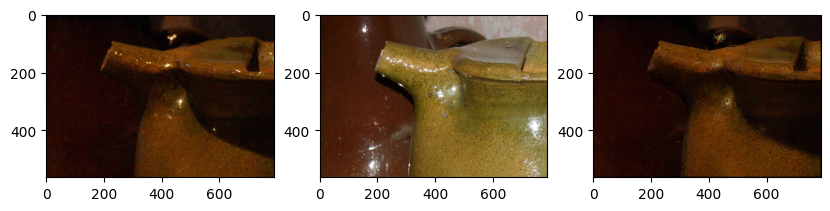

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

noflash_img=cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\3_a.jpg")

flash_img=cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\3_b.jpg")
nf_range=noflash_img.max()-noflash_img.min()
f_range=flash_img.max()-flash_img.min()
noflash_img=noflash_img[:,:,[2,1,0]]
flash_img=flash_img[:,:,[2,1,0]]


#gray joint bilateral filter
def bilateral_filter(nf_img,f_img,sigma_s,sigma_r):
    
    count=0
    filtered_img=np.zeros_like(nf_img)
    k_size=int(sigma_s)*4
    k_size=int(k_size)+1
    opt_samp=int(k_size)
    half_k=k_size//2
    flash=np.zeros((flash_img.shape[0]+2*(half_k),flash_img.shape[1]+2*(half_k),3))
    flash[(half_k-1):(flash_img.shape[0]+half_k-1),(half_k-1):(flash_img.shape[1]+half_k-1)]=f_img
    f_img=flash
    noflash=np.zeros((noflash_img.shape[0]+2*(half_k),noflash_img.shape[1]+2*(half_k),3))
    noflash[(half_k-1):(noflash_img.shape[0]+half_k-1),(half_k-1):(noflash_img.shape[1]+half_k-1)]=nf_img
    nf_img=noflash
    samp=np.random.randint(low=0, high=k_size**2, size=(opt_samp,), dtype=int)
    x=samp//k_size
    y=samp-(x)*k_size
    Y=np.array([x-1,y-1])
    X=np.array([[half_k],[half_k]])
    gauss_s=np.exp(-np.linalg.norm(np.transpose(X)-np.transpose(Y))*2/(2*sigma_s*2)) 
    gaussian_s=np.repeat(gauss_s,3,axis=0)
    denom=2*sigma_r**2
    for i in range(0,flash_img.shape[0]):
        #t01=0
        #t23=0
        i1=i+x-1
        i2=i+half_k
        for j in range(0,flash_img.shape[1]):
            #t0=time.time()
            j1=j+y-1
            gaussian_r=np.exp(-(f_img[i2,j+half_k]-f_img[i1,j1])**2/denom)#%7    
            weight=np.multiply(gaussian_s,gaussian_r)
            pixel=np.multiply(nf_img[i1,j1],weight)#20%
            #30%
            filtered_img[i,j,:]=np.divide(np.sum(pixel,axis=0),np.sum(weight,axis=0))
            #t1=time.time()
            #t01=t01+t1-t0
            #t23=t23+t3-t2
        #print(t23/t01)
        #count=count+1
        #print(count)
    return filtered_img
    
#gaussian blur


# detail transfer
e=0.02
E=np.ones_like(flash_img)*e
# a1=time.time()
F_base=bilateral_filter(flash_img,flash_img,7,f_range*0.1)
# b1=time.time()
F_detail=np.divide(flash_img+E,F_base+E)

# a2=time.time()
A_base=bilateral_filter(noflash_img,noflash_i   mg,7,nf_range*0.1)
# b2=time.time()
# a3=time.time()
A_NR=bilateral_filter(noflash_img,flash_img,7,f_range*0.001)
# b3=time.time()

M=np.where((np.linalg.norm(flash_img-noflash_img)<90)&(np.linalg.norm(flash_img-noflash_img)>300),1,0) #need to tune
M=M.astype(np.float32)  
#morphing closing
kernel = np.ones((5,5),np.uint8)
M=cv2.morphologyEx(M, cv2.MORPH_CLOSE, kernel)
M=cv2.blur(M,(5,5))

MANR=np.multiply(1-M,A_NR)
Final_img=np.multiply(MANR,F_detail)+np.multiply(M,A_base)


plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.imshow(noflash_img.astype(np.uint8))
plt.subplot(2,3,2)
plt.imshow(flash_img.astype(np.uint8))   

plt.subplot(2,3,3)
plt.imshow(Final_img.astype(np.uint8))

# print(b1-a1,b2-a2,b3-a3)

In [ ]:
import numpy as np
from scipy.ndimage import convolve
import cv2
import numpy as np
import matplotlib.pyplot as plt


def bilateral_filter(nf_img, f_img, sigma_s, sigma_r):
    k_size = int(sigma_s) * 4
    k_size = int(k_size) + 1
    opt_samp = int(k_size)
    half_k = k_size // 2

    # Pad images
    # f_img_padded = np.pad(f_img, ((half_k - 1, half_k - 1), (half_k - 1, half_k - 1), (0, 0)), mode='constant')
    # nf_img_padded = np.pad(nf_img, ((half_k - 1, half_k - 1), (half_k - 1, half_k - 1), (0, 0)), mode='constant')
    f_img_padded = np.pad(f_img, ((half_k - 1,) * 2, (half_k - 1,) * 2, (0, 0)), mode='constant')
    nf_img_padded = np.pad(nf_img, ((half_k - 1,) * 2, (half_k - 1,) * 2, (0, 0)), mode='constant')


    samp = np.random.randint(0, k_size ** 2, (opt_samp,), dtype=int)
    x, y = np.divmod(samp, k_size)
    Y, X = np.array([x - 1, y - 1]), np.array([[half_k], [half_k]])
    gaussian_s = np.repeat(np.exp(-np.linalg.norm(np.transpose(X) - np.transpose(Y)) * 2 / (2 * sigma_s ** 2)), 3, axis=0)
    denom = 2 * sigma_r ** 2

    # Filtered image initialization
    filtered_img = np.zeros_like(nf_img)

    for i in range(nf_img.shape[0]):
        i1, i2 = i + x - 1, i + half_k
        for j in range(nf_img.shape[1]):
            j1 = j + y - 1

            # Compute spatial and range Gaussian weights
            gaussian_r = np.exp(-((f_img_padded[i2, j + half_k] - f_img_padded[i1, j1]) / denom) ** 2)
            weight = np.multiply(gaussian_s, gaussian_r)

            # Apply bilateral filter
            pixel = nf_img_padded[i1, j1] * weight
            filtered_img[i, j, :] = pixel.sum(axis=0) / weight.sum()

    return filtered_img

# Example usage:
# filtered_image = bilateral_filter(noflash_img, flash_img, sigma_s=2, sigma_r=0.1)



noflash_img=cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\3_a.jpg")

flash_img=cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\3_b.jpg")


nf_range=noflash_img.max()-noflash_img.min()
f_range=flash_img.max()-flash_img.min()
noflash_img=noflash_img[:,:,[2,1,0]]
flash_img=flash_img[:,:,[2,1,0]]

C:\Users\DELL\AppData\Local\Temp\ipykernel_1616\299435164.py:39: RuntimeWarning: overflow encountered in exp
  gaussian_r = np.exp(-(img_padded[i2, j] - img_padded[i1, j1]) ** 2 / denom)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1616\299435164.py:43: RuntimeWarning: invalid value encountered in multiply
  pixel = np.multiply(img_padded[i1, j1], weight)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1616\299435164.py:44: RuntimeWarning: invalid value encountered in divide
  filtered_img[i - half_k + 1, j - half_k + 1, :] = np.divide(np.sum(pixel, axis=0), np.sum(weight, axis=0))
C:\Users\DELL\AppData\Local\Temp\ipykernel_1616\299435164.py:44: RuntimeWarning: invalid value encountered in cast
  filtered_img[i - half_k + 1, j - half_k + 1, :] = np.divide(np.sum(pixel, axis=0), np.sum(weight, axis=0))
C:\Users\DELL\AppData\Local\Temp\ipykernel_1616\299435164.py:43: RuntimeWarning: overflow encountered in multiply
  pixel = np.multiply(img_padded[i1, j1], weight)


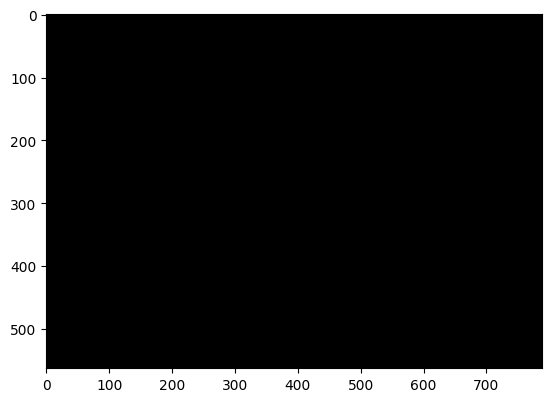

In [5]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

def compute_bilateral_filter(img, sigma_s, sigma_r):
    k_size = int(sigma_s) * 4
    k_size = int(k_size) + 1
    opt_samp = int(k_size)
    half_k = k_size // 2

    # Pad image
    img_padded = np.pad(img, ((half_k - 1, half_k - 1), (half_k - 1, half_k - 1), (0, 0)), mode='constant')

    # Randomly sample pixels
    samp = np.random.randint(low=0, high=k_size ** 2, size=(opt_samp,), dtype=int)
    x = samp // k_size
    y = samp - (x) * k_size
    Y = np.array([x - 1, y - 1])
    X = np.array([[half_k], [half_k]])
    gauss_s = np.exp(-np.linalg.norm(np.transpose(X) - np.transpose(Y)) * 2 / (2 * sigma_s ** 2))
    gaussian_s = np.repeat(gauss_s, 3, axis=0)
    denom = 2 * sigma_r ** 2

    # Filtered image initialization
    filtered_img = np.zeros_like(img)

    for i in range(half_k - 1, img.shape[0] + half_k - 1):
        i1 = i + x - 1
        i2 = i + half_k
        for j in range(half_k - 1, img.shape[1] + half_k - 1):
            j1 = j + y - 1

            # Check if indices are within bounds
            if i1.min() < 0 or i1.max() >= img_padded.shape[0] or j1.min() < 0 or j1.max() >= img_padded.shape[1]:
                continue

            # Compute spatial and range Gaussian weights
            gaussian_r = np.exp(-(img_padded[i2, j] - img_padded[i1, j1]) ** 2 / denom)
            weight = np.multiply(gaussian_s, gaussian_r)

            # Apply bilateral filter
            pixel = np.multiply(img_padded[i1, j1], weight)
            filtered_img[i - half_k + 1, j - half_k + 1, :] = np.divide(np.sum(pixel, axis=0), np.sum(weight, axis=0))

    return filtered_img

def process_images(flash_img, noflash_img, f_range, nf_range, e=0.02):
    E = np.ones_like(flash_img) * e

    # Bilateral filtering for base images
    F_base = compute_bilateral_filter(flash_img, 7, f_range * 0.1)
    A_base = compute_bilateral_filter(noflash_img, 7, nf_range * 0.1)

    # Bilateral filtering for detail images
    F_detail = np.divide(flash_img + E, F_base + E)

    # Additional bilateral filtering for noflash_img and flash_img
    A_NR = compute_bilateral_filter(noflash_img, 7, f_range * 0.001)  # Fix here

    # Binary mask M
    M = np.where((np.linalg.norm(flash_img - noflash_img) < 90) & (np.linalg.norm(flash_img - noflash_img) > 300), 1, 0)
    M = M.astype(np.float32)

    # Morphological operations on the mask M
    kernel = np.ones((5, 5), np.uint8)
    M = cv2.morphologyEx(M, cv2.MORPH_CLOSE, kernel)
    M = cv2.blur(M, (5, 5))

    # Compute final image
    MANR = np.multiply(1 - M, A_NR)
    Final_img = np.multiply(MANR, F_detail) + np.multiply(M, A_base)

    return Final_img
# Example usage:
# final_image = process_images(flash_img, noflash_img, f_range, nf_range, e=0.02)

# Example usage:
noflash_img=cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\3_a.jpg")

flash_img=cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\3_b.jpg")
nf_range=noflash_img.max()-noflash_img.min()
f_range=flash_img.max()-flash_img.min()
noflash_img=noflash_img[:,:,[2,1,0]]
flash_img=flash_img[:,:,[2,1,0]]
final_image = process_images(flash_img, noflash_img, f_range, nf_range, e=0.02)

plt.imshow(final_image.astype(np.uint8))   



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute bilateral filter on an image
def compute_bilateral_filter(img, sigma_s, sigma_r):
    # Set up parameters for bilateral filter
    k_size = int(sigma_s) * 4
    k_size = int(k_size) + 1
    opt_samp = int(k_size)
    half_k = k_size // 2

    # Pad image for convolution
    img_padded = np.pad(img, ((half_k - 1, half_k - 1), (half_k - 1, half_k - 1), (0, 0)), mode='constant')

    # Randomly sample pixels
    samp = np.random.randint(low=0, high=k_size ** 2, size=(opt_samp,), dtype=int)
    x = samp // k_size
    y = samp - (x) * k_size
    Y = np.array([x - 1, y - 1])
    X = np.array([[half_k], [half_k]])

    # Compute spatial Gaussian weights
    gauss_s = np.exp(-np.linalg.norm(np.transpose(X) - np.transpose(Y)) * 2 / (2 * sigma_s ** 2))
    gaussian_s = np.repeat(gauss_s, 3, axis=0)
    denom = 2 * sigma_r ** 2

    # Filtered image initialization
    filtered_img = np.zeros_like(img)

    # Loop over image pixels
    for i in range(half_k - 1, img.shape[0] + half_k - 1):
        i1 = i + x - 1
        i2 = i + half_k
        for j in range(half_k - 1, img.shape[1] + half_k - 1):
            j1 = j + y - 1

            # Check if indices are within bounds
            if i1.min() < 0 or i1.max() >= img_padded.shape[0] or j1.min() < 0 or j1.max() >= img_padded.shape[1]:
                continue

            # Compute range Gaussian weights
            gaussian_r = np.exp(-(img_padded[i2, j] - img_padded[i1, j1]) ** 2 / denom)
            weight = np.multiply(gaussian_s, gaussian_r)

            # Apply bilateral filter
            pixel = np.multiply(img_padded[i1, j1], weight)
            filtered_img[i - half_k + 1, j - half_k + 1, :] = np.divide(np.sum(pixel, axis=0), np.sum(weight, axis=0))

    return filtered_img

# Function to process flash and noflash images
def process_images(flash_img, noflash_img, f_range, nf_range, e=0.02):
    E = np.ones_like(flash_img) * e

    # Bilateral filtering for base images
    F_base = compute_bilateral_filter(flash_img, 7, f_range * 0.1)
    A_base = compute_bilateral_filter(noflash_img, 7, nf_range * 0.1)

    # Bilateral filtering for detail images
    F_detail = np.divide(flash_img + E, F_base + E)

    # Additional bilateral filtering for noflash_img and flash_img
    A_NR = compute_bilateral_filter(noflash_img, 7, f_range * 0.001)  # Fixed number of arguments here

    # Binary mask M
    M = np.where((np.linalg.norm(flash_img - noflash_img) < 90) & (np.linalg.norm(flash_img - noflash_img) > 300), 1, 0)
    M = M.astype(np.float32)

    # Morphological operations on the mask M
    kernel = np.ones((5, 5), np.uint8)
    M = cv2.morphologyEx(M, cv2.MORPH_CLOSE, kernel)
    M = cv2.blur(M, (5, 5))

    # Compute final image
    MANR = np.multiply(1 - M, A_NR)
    Final_img = np.multiply(MANR, F_detail) + np.multiply(M, A_base)

    return Final_img

# Example usage:
noflash_img = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\3_a.jpg")
flash_img = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\3_b.jpg")
nf_range = noflash_img.max() - noflash_img.min()
f_range = flash_img.max() - flash_img.min()
noflash_img = noflash_img[:, :, [2, 1, 0]]
flash_img = flash_img[:, :, [2, 1, 0]]
final_image = process_images(flash_img, noflash_img, f_range, nf_range, e=0.02)

# Display the flash image
plt.imshow(flash_img.astype(np.uint8))
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_1616\3725940791.py:47: RuntimeWarning: overflow encountered in exp
  gaussian = np.exp(-(conv_img_padd[n2, m] - conv_img_padd[n1, m1]) ** 2 / de_normztion)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1616\3725940791.py:51: RuntimeWarning: invalid value encountered in multiply
  pix = np.multiply(conv_img_padd[n1, m1], weights)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1616\3725940791.py:52: RuntimeWarning: invalid value encountered in divide
  filter_img_final[n - k_half + 1, m - k_half + 1, :] = np.divide(np.sum(pix, axis=0), np.sum(weights, axis=0))
C:\Users\DELL\AppData\Local\Temp\ipykernel_1616\3725940791.py:52: RuntimeWarning: invalid value encountered in cast
  filter_img_final[n - k_half + 1, m - k_half + 1, :] = np.divide(np.sum(pix, axis=0), np.sum(weights, axis=0))


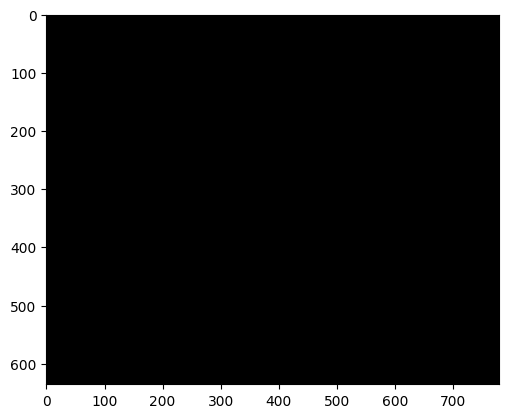

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute bilateral filter on an image
def compute_bilateral_filter(image, spatial_sig, range_sig):
    # Set up parameters for bilateral filter
    kernal_size = int(spatial_sig) * 4
    kernal_size = int(kernal_size) + 1
    rand_samp = int(kernal_size) # random pixel sampling and image padding.
    k_half = kernal_size // 2

    # Pad image for convolution
    conv_img_padd = np.pad(image, ((k_half - 1, k_half - 1), (k_half - 1, k_half - 1), (0, 0)), mode='constant')

    # Pad the input image with zeros to handle border pixels during convolution.
    # Randomly sample pixels
    samp_pix = np.random.randint(low=0, high=kernal_size ** 2, size=(rand_samp,), dtype=int)
    i = samp_pix // kernal_size
    j = samp_pix - i * kernal_size
    J = np.array([i - 1, j - 1])
    I = np.array([[k_half], [k_half]])

    #Randomly sample pixels within the filter kernel
    # Compute spatial Gaussian weights
    gauss_s = np.exp(-np.linalg.norm(np.transpose(I) - np.transpose(J)) * 2 / (2 * spatial_sig ** 2))
    gaussian_s = np.repeat(gauss_s, 3, axis=0)
    de_normztion = 2 * range_sig ** 2

    # Now Compute spatial Gaussian weights based on the Euclidean distance between sampled pixels.
    # Filtered image initialization
    filter_img_final = np.zeros_like(image)
    
    #Loop over image pixels, taking into account the padded borders.

    for n in range(k_half - 1, image.shape[0] + k_half - 1):
        n1 = n + i - 1
        n2 = n + k_half
        for m in range(k_half - 1, image.shape[1] + k_half - 1):
            m1 = m + j - 1

            # Check if indices are within bounds
            if n1.min() < 0 or n1.max() >= conv_img_padd.shape[0] or m1.min() < 0 or m1.max() >= conv_img_padd.shape[1]:
                continue

            # Compute range Gaussian weights
            gaussian = np.exp(-(conv_img_padd[n2, m] - conv_img_padd[n1, m1]) ** 2 / de_normztion)
            weights = np.multiply(gaussian_s, gaussian)

            # Apply bilateral filter
            pix = np.multiply(conv_img_padd[n1, m1], weights)
            filter_img_final[n - k_half + 1, m - k_half + 1, :] = np.divide(np.sum(pix, axis=0), np.sum(weights, axis=0))

    return filter_img_final

# Function to process flash and noflash images
def processing_images(flash_img, noflash_img, f_range, nf_range):
    G = np.ones_like(flash_img) * 0.02

    # Bilateral filtering for base images
    flash_base = compute_bilateral_filter(flash_img, 7, f_range * 0.1)
    non_flash_base = compute_bilateral_filter(noflash_img, 7, nf_range * 0.1)

    # Bilateral filtering for detail images
    # Compute detail images (F_detail) by dividing the flash image by the corresponding base image.
    flash_detial = np.divide(flash_img + G, flash_base + G)

    # Additional bilateral filtering for noflash_img and flash_img
    noflash_detial = compute_bilateral_filter(noflash_img, 7, f_range * 0.001)  # Fixed number of arguments here

    # Binary mask M
    mask_b = np.where((np.linalg.norm(flash_img - noflash_img) < 90) & (np.linalg.norm(flash_img - noflash_img) > 300), 1, 0)
    mask_b = mask_b.astype(np.float32)
    #Perform morphological operations (closing and blurring) on the binary mask .
    # Morphological operations on the mask M
    kernel = np.ones((5, 5), np.uint8)
    mask_b = cv2.morphologyEx(mask_b, cv2.MORPH_CLOSE, kernel)
    mask_b = cv2.blur(mask_b, (5, 5))

    # Compute final image
    comb_img = np.multiply(1 - mask_b, noflash_detial)
    img_final = np.multiply(comb_img, flash_detial) + np.multiply(mask_b, non_flash_base)

    return img_final


def solution(image_path_a, image_path_b):
    ############################
    ############################
    ## image_path_a is path to the non-flash high ISO image
    ## image_path_b is path to the flash low ISO image
    ############################
    ############################
    ## comment the line below before submitting else your code wont be executed##
    # pass
    image_no_flash = (image_path_a)
    image_flash = (image_path_b)
    range_NF = image_no_flash.max() - image_no_flash.min()
    range_F = image_flash.max() - image_flash.min()
    image_no_flash = image_no_flash[:, :, [2, 1, 0]]
    image_flash = image_flash[:, :, [2, 1, 0]]
    image = processing_images(image_flash, image_no_flash, range_F, range_NF)

    return image

noflash_img = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\1_a.jpg")
flash_img = cv2.imread("C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment-2_newtestcases\\Assignment-2\\Q2\\ultimate_test\\1_b.jpg")

final_image = solution(noflash_img,flash_img)
# Display the flash image
plt.imshow(final_image.astype(np.uint8))
plt.show()